<a href="https://colab.research.google.com/github/ssuzana/Machine-Learning-Notebooks/blob/main/Data%20Exploration%20and%20Visualization/Programming_Languages_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

The oldest programming language still in use today is FORTRAN, which was developed in 1957. Since then many other programming languages have been developed. But which programming language is the most popular? 

StackOverflow will help us answer this question. Each post on Stack OverFlow comes with a Tag. And this Tag can be the name of a programming language.

To figure out which language is the most popular, we will count the number of posts on Stack Overflow that are tagged with each language. The language with the most posts wins!

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

## Data Exploration

In [ ]:
drive.mount('/content/drive')

In [75]:
# read the .csv file and store it in a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/QueryResults.csv')

In [76]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [77]:
# rename features
df.rename(columns={"m": 'DATE', "TagName": 'TAG', "Unnamed: 2": "POSTS"}, inplace=True)
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


Altearnatively, we could have renamed the columns when we read the csv file:

`df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)`


In [78]:
df.shape

(2440, 3)

In [79]:
# the number of non-NaN values in each column
df.count()

DATE     2440
TAG      2440
POSTS    2440
dtype: int64

In [80]:
# get the total number of posts per language
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,42486
c,394707
c#,1586819
c++,791388
delphi,50734
go,68440
java,1892579
javascript,2485921
perl,67606


## Data Cleaning

We fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [81]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [82]:
reshaped_df = df.pivot_table(index='DATE', columns='TAG', values='POSTS', fill_value=0)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0,0,3,0,0,0,0,0,0,0,0,0,0,0
2008-08-01,8,83,505,164,14,0,222,163,28,158,120,0,70,0
2008-09-01,28,319,1642,754,104,0,1129,634,130,476,536,6,287,0
2008-10-01,16,302,1988,807,112,0,1149,722,128,610,506,0,247,0
2008-11-01,16,258,1730,734,141,0,956,580,97,500,450,1,158,0


In [83]:
reshaped_df.isna().values.any()

False

## Data Visualization with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [109]:
%matplotlib inline

A couple of methods that will help us style our chart:

`.figure()` - allows us to resize our chart

`.xticks()` - configures our x-axis

`.yticks()` - configures our y-axis

`.xlabel()` - add text to the x-axis

`.ylabel()` - add text to the y-axis

`.ylim()` - allows us to set a lower and upper bound



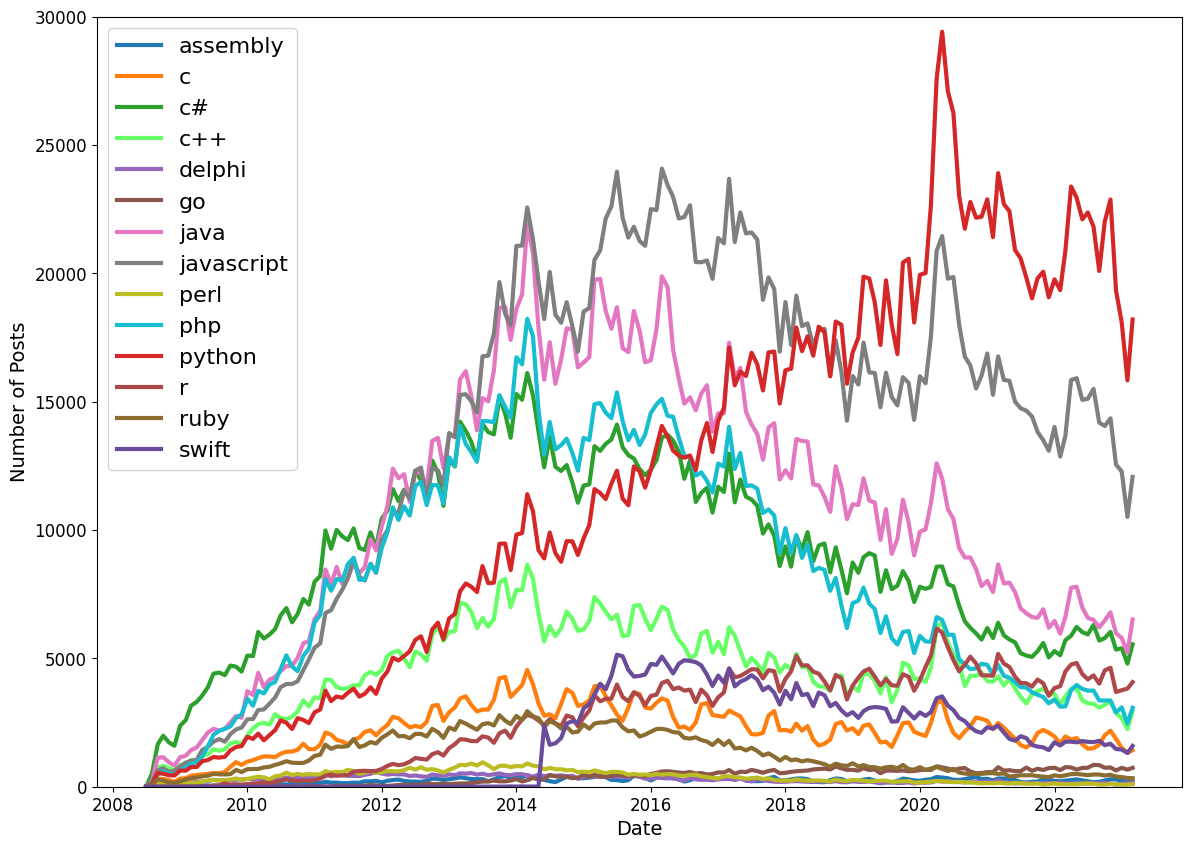

In [139]:
plt.figure(figsize=(14,10)) 

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
    
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#66ff66','#9467bd', 
          '#8c564b','#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#d62728', '#ad494a','#8c6d31', '#6b4c9a'] 

# Loop through the columns and plot each line with a unique color
for i, column in enumerate(reshaped_df.columns):
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name, color=colors[i])    
 
plt.legend(fontsize=16)
plt.savefig("prog-lang-popularity")
plt.show()

It looks like Python is currently the most popular programming language judging by the number of posts on Stack Overflow.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

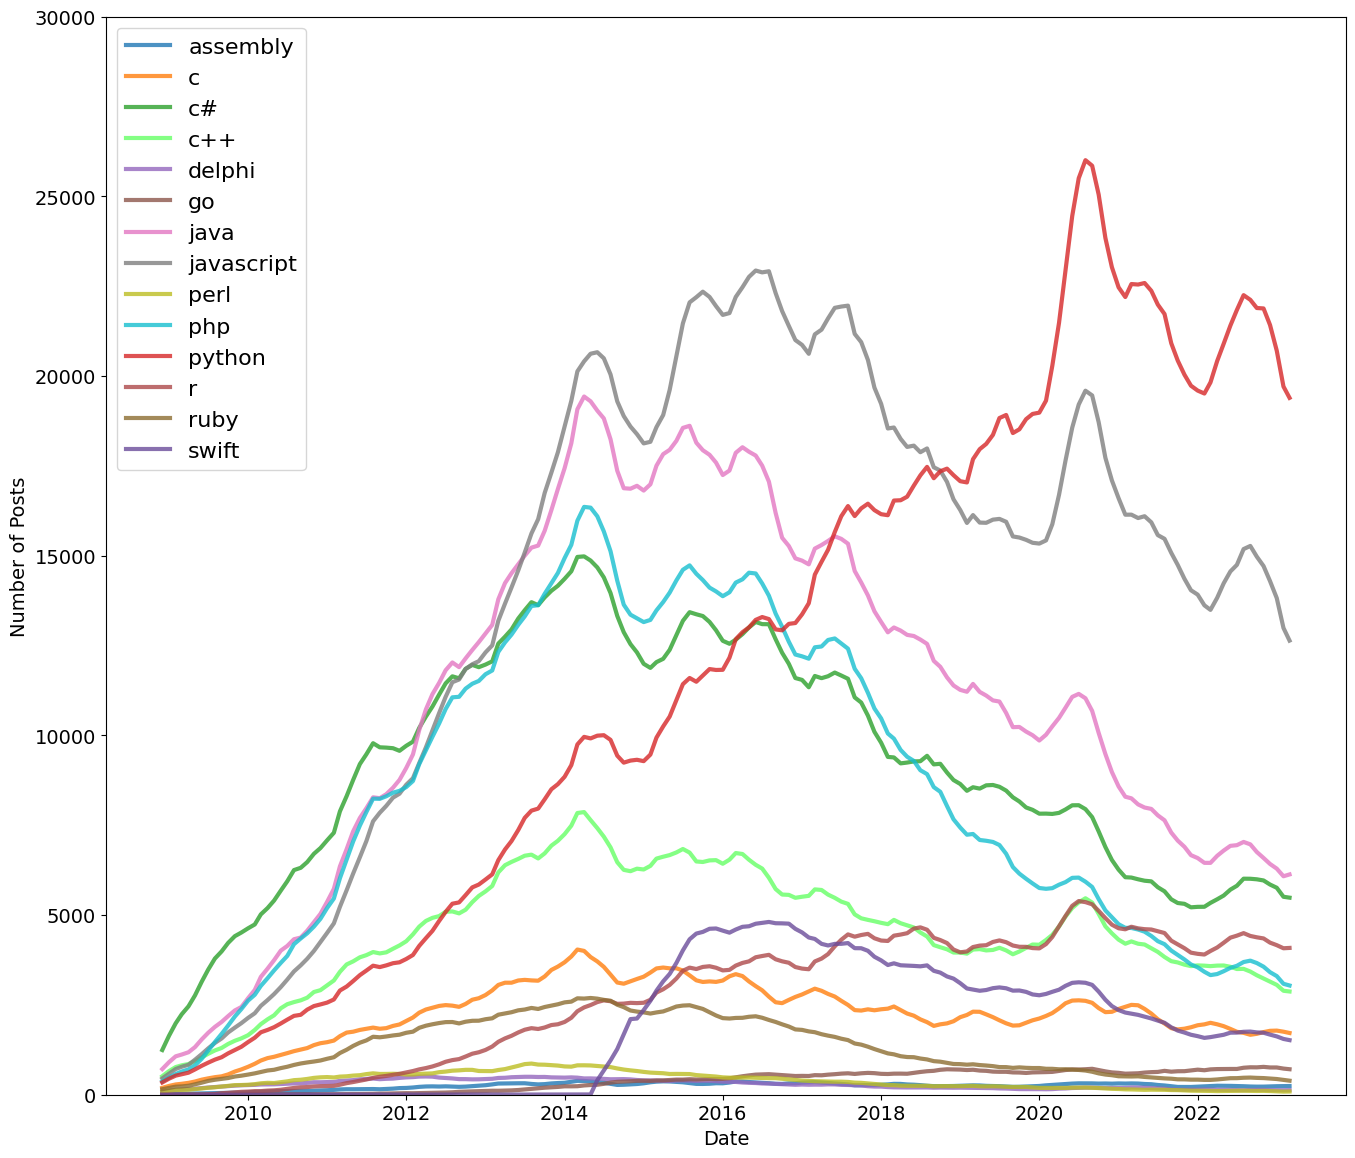

In [138]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,14))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#66ff66','#9467bd', 
          '#8c564b','#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#d62728', '#ad494a','#8c6d31', '#6b4c9a'] 

# plot the roll_df instead
for i, column in enumerate(roll_df.columns):
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name, color=colors[i],alpha=0.8)

plt.legend(fontsize=16)
plt.savefig("prog-lang-popularity")
plt.show()    